---

# <center>★ AI / ML Project - Transfer Learning★
#### <center> ***Domain: Advanced Deep Learning***

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Transfer_Learning/main/TL2a.jpg" style="width: 800px;"/>

---

### Description:

The reuse of a pre-trained model on a new problem is known as transfer learning in machine learning. A machine uses the knowledge learned from a prior assignment to increase prediction about a new task in transfer learning. You could, for example, use the information gained during training to distinguish beverages when training a classifier to predict whether an image contains cuisine.

The reuse of a previously learned model on a new problem is known as transfer learning. It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data. This is particularly valuable in the field of data science, as most real-world situations do not require millions of labelled data points to train complicated models.

Transfer learning offers a number of advantages, the most important of which are reduced training time, improved neural network performance (in most circumstances), and the absence of a large amount of data.


### Acknowledgement: 
The dataset is referred from Tensorflow Datasets.

### Objective:
- Understand the Dataset & perform necessary Preprocessing.
- Design a Simple Neural Network Architecture to classify the Digit Images.
- Utilize a pre trained model, and configure it for the given classification problem.
- Evaluate the models' performance & compare their Accuracy, Precsison, Recall, F1, etc.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Data Pre-processing
3. Predictive Modelling
4. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import tensorflow as tf
import tensorflow_datasets as tfds

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [2]:
#Loading the dataset

(train, test), ds_info = tfds.load('cifar10', split=['train', 'test'], shuffle_files=True, 
                                         as_supervised=True, with_info=True)

2022-07-26 21:45:05.760503: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

2022-07-26 21:45:17.347947: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Shuffling cifar10-train.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling cifar10-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


2022-07-26 21:45:57.568969: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called..

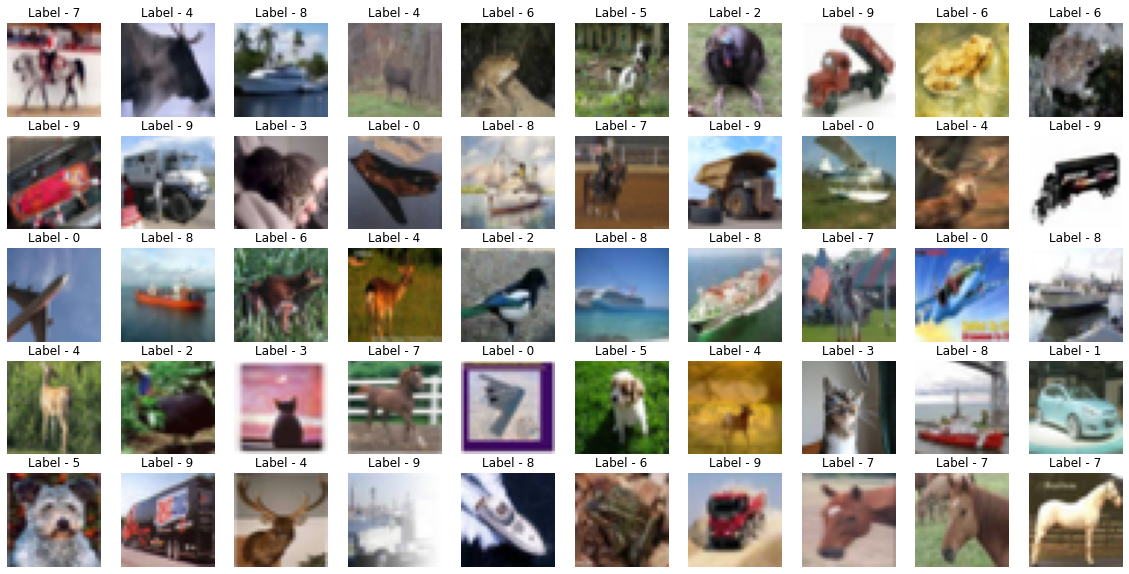

In [3]:
#Visualising te images

n=50
x = np.concatenate([x for x, y in train.take(n)], axis=0)
y = [y.numpy() for x, y in train.take(n)]

plt.figure(figsize=[20,10])
for e,i in enumerate(x.reshape(n,32,32,3)):
    plt.subplot(math.ceil(n/10),10,e+1)
    plt.title("Label - {}".format(y[e]))
    plt.imshow(i, cmap='gray')
    plt.axis('off')
plt.show()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

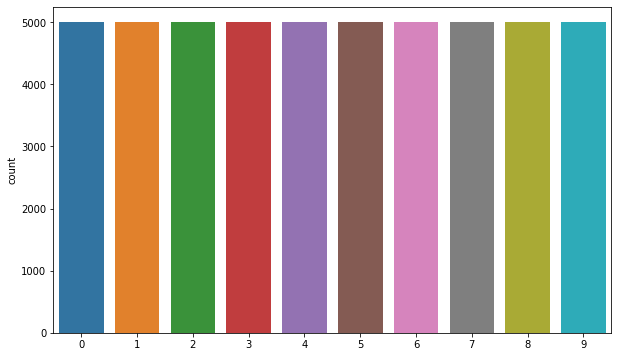

In [4]:
#Checking the Label Distribution

y_count = [y.numpy() for x, y in train]
sns.countplot(y_count)
plt.show()

---

# <center>2. Data Preprocessing

In [5]:
#Defining a custom function to normalise the images

def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

def normalize_img_large(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, (512,512))
    return tf.cast(image, tf.float32) / 255., label

In [6]:
#Preprocessing training dataset

ds_train = train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_train_tl = train.map(normalize_img_large, num_parallel_calls=tf.data.AUTOTUNE)
ds_train_tl = ds_train_tl.cache()
ds_train_tl = ds_train_tl.shuffle(ds_info.splits['train'].num_examples)
ds_train_tl = ds_train_tl.batch(128)
ds_train_tl = ds_train_tl.prefetch(tf.data.AUTOTUNE)

In [7]:
#Preprocessing testing dataset

ds_test = test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

ds_test_tl = test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test_tl = ds_test_tl.batch(128)
ds_test_tl = ds_test_tl.cache()
ds_test_tl = ds_test_tl.prefetch(tf.data.AUTOTUNE)

---

# <center>3. Predictive Modelling

### A. Using Simple Model Architecture

In [8]:
#Building Deep Learning Model Architecture

base_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

#Compiling the Model

base_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Training the Model

n=25
history = base_model.fit(
                    ds_train,
                    epochs=n,
                    validation_data=ds_test,
                )

Epoch 1/25
382/391 [============================>.] - ETA: 0s - loss: 1.9245 - sparse_categorical_accuracy: 0.3177

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

391/391 [==============================] - 7s 12ms/step - loss: 1.9230 - sparse_categorical_accuracy: 0.3185 - val_loss: 1.7804 - val_sparse_categorical_accuracy: 0.3676


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

Epoch 2/25
391/391 [==============================] - 2s 6ms/step - loss: 1.7632 - sparse_categorical_accuracy: 0.3747 - val_loss: 1.7082 - val_sparse_categorical_accuracy: 0.3896
Epoch 3/25
391/391 [==============================] - 2s 6ms/step - loss: 1.6920 - sparse_categorical_accuracy: 0.4007 - val_loss: 1.6594 - val_sparse_categorical_accuracy: 0.4069
Epoch 4/25
391/391 [==============================] - 2s 5ms/step - loss: 1.6375 - sparse_categorical_accuracy: 0.4210 - val_loss: 1.6508 - val_sparse_categorical_accuracy: 0.4173
Epoch 5/25
391/391 [==============================] - 2s 5ms/step - loss: 1.6049 - sparse_categorical_accuracy: 0.4318 - val_loss: 1.5882 - val_sparse_categorical_accuracy: 0.4373
Epoch 6/25
391/391 [==============================] - 2s 5ms/step - loss: 1.5767 - sparse_categorical_accuracy: 0.4421 - val_loss: 1.5731 - val_sparse_categorical_accuracy: 0.4455
Epoch 7/25
391/391 [==============================] - 2s 6ms/step - loss: 1.5570 - sparse_categorica

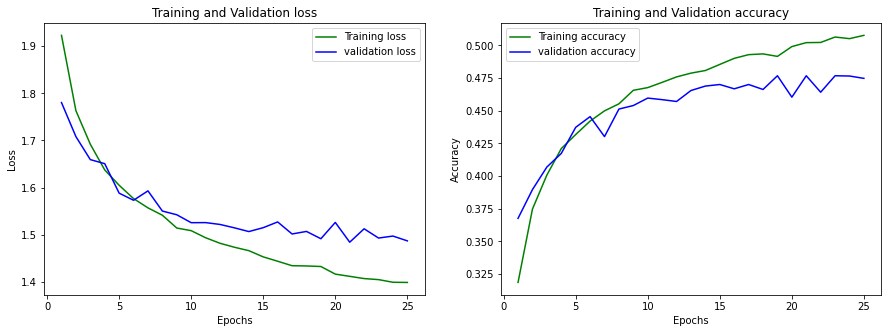

In [10]:
#Visualising model performance

def plot_model_performance(history):
    acc_train = history.history['sparse_categorical_accuracy']
    acc_val = history.history['val_sparse_categorical_accuracy']

    loss_train = history.history['loss']
    loss_val = history.history['val_loss']

    epochs = range(1,n+1)
    plt.figure(figsize=[15,5])

    plt.subplot(1,2,1)
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, acc_train, 'g', label='Training accuracy')
    plt.plot(epochs, acc_val, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_model_performance(history)

### B. Using Pre Trained Model Architecture

In [11]:
#Building Deep Learning Model Architecture

resnet_50 = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet')
resnet_50.trainable=False

inputs = tf.keras.Input(shape=(512,512,3))
x = resnet_50(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
resnet_50_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_model")

#Compiling the Model

resnet_50_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

resnet_50_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
#Training the Model

n=25
history_tl = resnet_50_model.fit(
                    ds_train_tl,
                    epochs=n,
                    validation_data=ds_test_tl,
                )

Epoch 1/25


2022-07-26 21:47:39.466855: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 4128 of 50000


In [ ]:
#Visualising model performance
    
plot_model_performance(history_tl)

---

# <center>4. Outcomes & Project Conclusion

### Here are some of the key outcomes of the project:
- The  Image Dataset was large enough with 60k training samples & 10k testing samples.
- Visualising the image samples & it's distribution, helped us to get some insights into the dataset.
- The classes were not imbalanced, hence we did not perform data augmentation.
- The Model Architecture was reconstructed & configured for the current problem.
- We were able to plot the model graph & observe input & output shapes of all the layers.
- Also we could identify that the total trainable paramters for the ReseNet 50 model were 23.6M.
- To demonstrate it's functionality, we have tested the model for just 25 epochs (due to hardware limitations).
- The performance of pretrained model out-performed the simple Vanilla Nerual Netwaork, achieving an accuracy of 92%.

In [ ]:
#<<<--------------------------------------THE END---------------------------------------->>>